# API Test Notebook + Automate API Extraction + Append Data Project

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'25',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '486f50de-4998-46bb-8a2e-8d240f8d2e39',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-01-16T02:07:17.103Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 8705}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10707, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [3]:
import pandas as pd

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-01-16T02:07:17.103Z,0,None,26,1,None,8705


In [5]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959966e+07,1.959966e+07,...,8.342075e+11,49.7741,8.938092e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,8249,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201808e+08,1.201808e+08,...,3.021226e+11,18.0265,3.021226e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,71385,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.512172e+10,9.860296e+10,...,9.505555e+10,5.6716,9.853437e+10,NaN,2024-01-16T02:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516895e+08,1.516895e+08,...,4.816533e+10,2.8738,4.816533e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN
4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.326979e+08,5.672283e+08,...,4.129563e+10,2.4632,5.413487e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1199,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,...,3.110151e+10,1.8557,5.731220e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN
6,3408,USDC,USDC,usd-coin,16213,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.546516e+10,2.546516e+10,...,2.546800e+10,1.5196,2.546800e+10,NaN,2024-01-16T02:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
7,2010,Cardano,ADA,cardano,1025,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539520e+10,3.654270e+10,...,1.880169e+10,1.1218,2.390370e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.666500e+08,4.346830e+08,...,1.308761e+10,0.7809,2.570048e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN
9,74,Dogecoin,DOGE,dogecoin,873,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.426694e+11,1.426694e+11,...,1.156152e+10,0.6898,1.156152e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN


In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.json_normalize(data['data'])

df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959966e+07,1.959966e+07,False,NaN,1,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,42562.340982,2.117822e+10,12.6124,-0.199480,0.788231,-8.580221,1.280030,16.386155,49.833204,8.342075e+11,49.7741,8.938092e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
1,1027,Ethereum,ETH,ethereum,8249,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201808e+08,1.201808e+08,True,NaN,2,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,2513.900435,8.766965e+09,-14.0435,-0.113380,0.545820,8.818868,13.117437,26.471859,60.187360,3.021226e+11,18.0265,3.021226e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
2,825,Tether USDt,USDT,tether,71385,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.512172e+10,9.860296e+10,True,NaN,3,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.999304,3.998190e+10,8.8583,-0.013202,-0.036060,-0.130696,0.026755,-0.074768,-0.107789,9.505555e+10,5.6716,9.853437e+10,NaN,2024-01-16T02:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 19:07:42.483675
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516895e+08,1.516895e+08,False,NaN,4,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,317.525772,1.735694e+09,115.0460,0.467010,4.288114,5.865298,30.427773,29.373322,50.048547,4.816533e+10,2.8738,4.816533e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.326979e+08,5.672283e+08,True,NaN,5,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,95.437544,1.701369e+09,-38.1330,-0.070625,-0.244512,-1.778590,30.549907,58.580387,298.208389,4.129563e+10,2.4632,5.413487e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
5,52,XRP,XRP,xrp,1199,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,0.573122,9.852773e+08,11.9864,-0.009777,-1.570746,-0.114541,-7.674294,-7.982113,16.940431,3.110151e+10,1.8557,5.731220e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
6,3408,USDC,USDC,usd-coin,16213,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.546516e+10,2.546516e+10,False,NaN,7,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,1.000111,4.605062e+09,11.1077,0.001954,0.003184,0.007662,0.019671,0.003806,0.003318,2.546800e+10,1.5196,2.546800e+10,NaN,2024-01-16T02:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-15 19:07:42.483675
7,2010,Cardano,ADA,cardano,1025,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539520e+10,3.654270e+10,False,NaN,8,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.531193,3.186934e+08,-10.4783,-0.352816,-0.533309,0.436236,-12.334437,40.570131,115.924047,1.880169e+10,1.1218,2.390370e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.

In [8]:
def api_runner():
    
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '486f50de-4998-46bb-8a2e-8d240f8d2e39',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df2 = df.append(df2)
    
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df2,df_append])
    
    if not os.path.isfile(r'C:\Users\seyeo\Desktop\CODING\PYTHON_SERIES_ALEX_BOOTCAMP\API.csv'):
        df.to_csv(r'C:\Users\seyeo\Desktop\CODING\PYTHON_SERIES_ALEX_BOOTCAMP\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\seyeo\Desktop\CODING\PYTHON_SERIES_ALEX_BOOTCAMP\API.csv', mode='a', header=False)

In [9]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2024-01-16T02:07:46.567Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 8705}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10707, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

AttributeError: 'DataFrame' object has no attribute 'append'

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.959966e+07,1.959966e+07,False,NaN,1,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,42562.340982,2.117822e+10,12.6124,-0.199480,0.788231,-8.580221,1.280030,16.386155,49.833204,8.342075e+11,49.7741,8.938092e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
1,1027,Ethereum,ETH,ethereum,8249,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201808e+08,1.201808e+08,True,NaN,2,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,2513.900435,8.766965e+09,-14.0435,-0.113380,0.545820,8.818868,13.117437,26.471859,60.187360,3.021226e+11,18.0265,3.021226e+11,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
2,825,Tether USDt,USDT,tether,71385,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.512172e+10,9.860296e+10,True,NaN,3,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.999304,3.998190e+10,8.8583,-0.013202,-0.036060,-0.130696,0.026755,-0.074768,-0.107789,9.505555e+10,5.6716,9.853437e+10,NaN,2024-01-16T02:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 19:07:42.483675
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516895e+08,1.516895e+08,False,NaN,4,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,317.525772,1.735694e+09,115.0460,0.467010,4.288114,5.865298,30.427773,29.373322,50.048547,4.816533e+10,2.8738,4.816533e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.326979e+08,5.672283e+08,True,NaN,5,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,95.437544,1.701369e+09,-38.1330,-0.070625,-0.244512,-1.778590,30.549907,58.580387,298.208389,4.129563e+10,2.4632,5.413487e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
5,52,XRP,XRP,xrp,1199,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.426682e+10,9.998801e+10,False,NaN,6,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,0.573122,9.852773e+08,11.9864,-0.009777,-1.570746,-0.114541,-7.674294,-7.982113,16.940431,3.110151e+10,1.8557,5.731220e+10,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
6,3408,USDC,USDC,usd-coin,16213,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.546516e+10,2.546516e+10,False,NaN,7,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,1.000111,4.605062e+09,11.1077,0.001954,0.003184,0.007662,0.019671,0.003806,0.003318,2.546800e+10,1.5196,2.546800e+10,NaN,2024-01-16T02:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-15 19:07:42.483675
7,2010,Cardano,ADA,cardano,1025,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.539520e+10,3.654270e+10,False,NaN,8,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.531193,3.186934e+08,-10.4783,-0.352816,-0.533309,0.436236,-12.334437,40.570131,115.924047,1.880169e+10,1.1218,2.390370e+10,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
8,5805,Avalanche,AVAX,avalanche,636,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000e+08,3.

In [11]:
df5 = pd.read_csv(r'C:\Users\seyeo\Desktop\CODING\PYTHON_SERIES_ALEX_BOOTCAMP\API.csv')
df5

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10696,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.959503e+07,1.959503e+07,False,NaN,1,NaN,NaN,NaN,2024-01-11T01:43:00.000Z,46537.476318,5.020049e+10,29.2420,-0.035259,1.680330,9.005464,11.663938,25.868776,73.515148,9.119033e+11,51.6172,9.772870e+11,NaN,2024-01-11T01:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 18:44:05.223870
1,1,1027,Ethereum,ETH,ethereum,8211,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201842e+08,1.201842e+08,True,NaN,2,NaN,NaN,NaN,2024-01-11T01:43:00.000Z,2575.865130,2.898839e+10,83.7216,-0.482904,8.621735,16.605185,15.148232,26.341677,66.920775,3.095782e+11,17.5233,3.095782e+11,NaN,2024-01-11T01:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 18:44:05.223870
2,2,825,Tether USDt,USDT,tether,71059,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.461912e+10,9.760296e+10,True,NaN,3,NaN,NaN,NaN,2024-01-11T01:42:00.000Z,1.000418,8.136019e+10,32.7208,0.032503,0.026627,-0.033125,0.089851,0.005968,0.075838,9.465871e+10,5.3580,9.764380e+10,NaN,2024-01-11T01:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-10 18:44:05.223870
3,3,1839,BNB,BNB,bnb,2005,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516903e+08,1.516903e+08,False,NaN,4,NaN,NaN,NaN,2024-01-11T01:42:00.000Z,304.822334,1.232737e+09,-7.8108,0.448743,0.884941,-2.537326,22.574435,23.024921,47.863138,4.623860e+10,2.6173,4.623860e+10,NaN,2024-01-11T01:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 18:44:05.223870
4,4,5426,Solana,SOL,solana,613,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.321477e+08,5.668932e+08,True,NaN,5,NaN,NaN,NaN,2024-01-11T01:43:00.000Z,100.085137,4.355914e+09,10.5230,-1.007412,1.622270,1.575371,40.257643,76.381393,368.369028,4.325156e+10,2.4482,5.673758e+10,NaN,2024-01-11T01:43:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-10 18:44:05.223870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,95,23121,Blur,BLUR,blur-token,182,2023-02-13T15:07:24.000Z,"['collectibles-nfts', 'egirl-capital-portfolio']",NaN,1.225183e+09,3.000000e+09,False,NaN,96,8.256548e+07,4.487248e+07,NaN,2024-01-11T17:50:00.000Z,0.543478,4.249403e+08,74.8989,0.501226,12.141351,4.518031,19.836946,29.186207,239.693045,6.658593e+08,0.0377,1.630433e+09,NaN,2024-01-11T17:50:00.000Z,1027.0,Ethereum,ETH,ethereum,0x5283d291dbcf85356a21ba090e6db59121208b44,2024-01-11 10:52:40.765229
996,96,4687,BUSD,BUSD,binance-usd,7560,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,6.250628e+08,6.250628e+08,True,NaN,97,NaN,NaN,NaN,2024-01-11T17:50:00.000Z,0.999169,6.424490e+07,25.6191,-0.002764,-0.119329,-0.115575,-0.289871,-0.085345,-0.102861,6.245437e+08,0.0354,6.245437e+08,NaN,2024-01-11T17:50:00.000Z,1839.0,BNB Beacon Chain (BEP2),BNB,bnb,BUSD-BD1,2024-01-11 10:52:40.765229
997,97,5632,Arweave,AR,arweave,107,2020-05-27T00:00:00.000Z,"['distributed-computing', 'filesharing', 'stor...",6.600000e+07,6.545418e+07,6.545418e+07,False,NaN,98,NaN,NaN,NaN,2024-01-11T17:50:00.000Z,9.430881,4.117287e+07,47.6393,0.954329,11.991653,3.891008,17.429267,31.050236,145.754305

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10707,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19599662.00000,19599662.00000,False,NaN,1,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,42562.34098,21178217857.34449,12.61240,-0.19948,0.78823,-8.58022,1.28003,16.38615,49.83320,834207497168.98474,49.77410,893809160614.54004,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
1,1027,Ethereum,ETH,ethereum,8249,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180819.14964,120180819.14964,True,NaN,2,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,2513.90043,8766965025.12033,-14.04350,-0.11338,0.54582,8.81887,13.11744,26.47186,60.18736,302122613489.86908,18.02650,302122613489.87000,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
2,825,Tether USDt,USDT,tether,71385,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,95121720210.82974,98602960962.73218,True,NaN,3,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.99930,39981902547.10634,8.85830,-0.01320,-0.03606,-0.13070,0.02676,-0.07477,-0.10779,95055547701.76759,5.67160,98534366688.85001,NaN,2024-01-16T02:05:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-01-15 19:07:42.483675
3,1839,BNB,BNB,bnb,2008,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151689519.71468,151689519.71468,False,NaN,4,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,317.52577,1735694330.56367,115.04600,0.46701,4.28811,5.86530,30.42777,29.37332,50.04855,48165331839.62405,2.87380,48165331839.62000,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
4,5426,Solana,SOL,solana,614,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,432697901.36203,567228250.17221,True,NaN,5,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,95.43754,1701368601.24151,-38.13300,-0.07062,-0.24451,-1.77859,30.54991,58.58039,298.20839,41295625134.97478,2.46320,54134871260.86000,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
5,52,XRP,XRP,xrp,1199,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54266821529.00000,99988013070.00000,False,NaN,6,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,0.57312,985277311.26061,11.98640,-0.00978,-1.57075,-0.11454,-7.67429,-7.98211,16.94043,31101507784.66685,1.85570,57312197229.10000,NaN,2024-01-16T02:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-01-15 19:07:42.483675
6,3408,USDC,USDC,usd-coin,16213,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25465163043.31272,25465163043.31272,False,NaN,7,NaN,NaN,NaN,2024-01-16T02:06:00.000Z,1.00011,4605062196.44382,11.10770,0.00195,0.00318,0.00766,0.01967,0.00381,0.00332,25467995603.59840,1.51960,25467995603.60000,NaN,2024-01-16T02:06:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-01-15 19:07:42.483675
7,2010,Cardano,ADA,cardano,1025,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35395195675.94300,36542697459.69000,False,NaN,8,NaN,NaN,NaN,2024-01-16T02:05:00.000Z,0.53119,318693448.83331,-10.47830,-0.35282,-0.53331,0.43624,-12.33444,40.57013,115.92405,18801693324.46516,1.12180,23903701715.54000,NaN,2024-01-16T02:05:00.000Z,NaN,NaN,NaN,NaN,

In [16]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.19948,0.78823,-8.58022,1.28003,16.38615,49.83320
Ethereum,-0.11338,0.54582,8.81887,13.11744,26.47186,60.18736
Tether USDt,-0.01320,-0.03606,-0.13070,0.02676,-0.07477,-0.10779
BNB,0.46701,4.28811,5.86530,30.42777,29.37332,50.04855
Solana,-0.07062,-0.24451,-1.77859,30.54991,58.58039,298.20839
XRP,-0.00978,-1.57075,-0.11454,-7.67429,-7.98211,16.94043
USDC,0.00195,0.00318,0.00766,0.01967,0.00381,0.00332
Cardano,-0.35282,-0.53331,0.43624,-12.33444,40.57013,115.92405
Avalanche,-0.61829,-0.51668,0.64355,-16.38192,45.62613,293.41532


In [17]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     -0.19948
           quote.USD.percent_change_24h     0.78823
           quote.USD.percent_change_7d     -8.58022
           quote.USD.percent_change_30d     1.28003
           quote.USD.percent_change_60d    16.38615
                                             ...   
Injective  quote.USD.percent_change_24h    10.80885
           quote.USD.percent_change_7d     -2.32605
           quote.USD.percent_change_30d    39.72209
           quote.USD.percent_change_60d   151.77703
           quote.USD.percent_change_90d   424.82833
Length: 150, dtype: float64

In [18]:
type(df3)

pandas.core.frame.DataFrame

In [19]:
type(df4)

pandas.core.series.Series

In [24]:
df6 = df4.to_frame(name = 'values')
df6

values
name                                            
Bitcoin   quote.USD.percent_change_1h   -0.19948
          quote.USD.percent_change_24h   0.78823
          quote.USD.percent_change_7d   -8.58022
          quote.USD.percent_change_30d   1.28003
          quote.USD.percent_change_60d  16.38615
...                                          ...
Injective quote.USD.percent_change_24h  10.80885
          quote.USD.percent_change_7d   -2.32605
          quote.USD.percent_change_30d  39.72209
          quote.USD.percent_change_60d 151.77703
          quote.USD.percent_change_90d 424.82833

[150 rows x 1 columns]

In [21]:
#df6 = df4.set_index(df6['name'])
#df6

AttributeError: 'Series' object has no attribute 'set_index'

In [25]:
df6.count()

values    150
dtype: int64

In [26]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19948
1,Bitcoin,quote.USD.percent_change_24h,0.78823
2,Bitcoin,quote.USD.percent_change_7d,-8.58022
3,Bitcoin,quote.USD.percent_change_30d,1.28003
4,Bitcoin,quote.USD.percent_change_60d,16.38615
...,...,...,...
145,Injective,quote.USD.percent_change_24h,10.80885
146,Injective,quote.USD.percent_change_7d,-2.32605
147,Injective,quote.USD.percent_change_30d,39.72209
148,Injective,quote.USD.percent_change_60d,151.77703


In [27]:
df8 = df7.rename(columns = {'level_1': 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.19948
1,Bitcoin,quote.USD.percent_change_24h,0.78823
2,Bitcoin,quote.USD.percent_change_7d,-8.58022
3,Bitcoin,quote.USD.percent_change_30d,1.28003
4,Bitcoin,quote.USD.percent_change_60d,16.38615
...,...,...,...
145,Injective,quote.USD.percent_change_24h,10.80885
146,Injective,quote.USD.percent_change_7d,-2.32605
147,Injective,quote.USD.percent_change_30d,39.72209
148,Injective,quote.USD.percent_change_60d,151.77703


In [37]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h','24h', '7d', '30d', '60d', '90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,-0.19948
1,Bitcoin,24h,0.78823
2,Bitcoin,7d,-8.58022
3,Bitcoin,30d,1.28003
4,Bitcoin,60d,16.38615
...,...,...,...
145,Injective,24h,10.80885
146,Injective,7d,-2.32605
147,Injective,30d,39.72209
148,Injective,60d,151.77703


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\seyeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


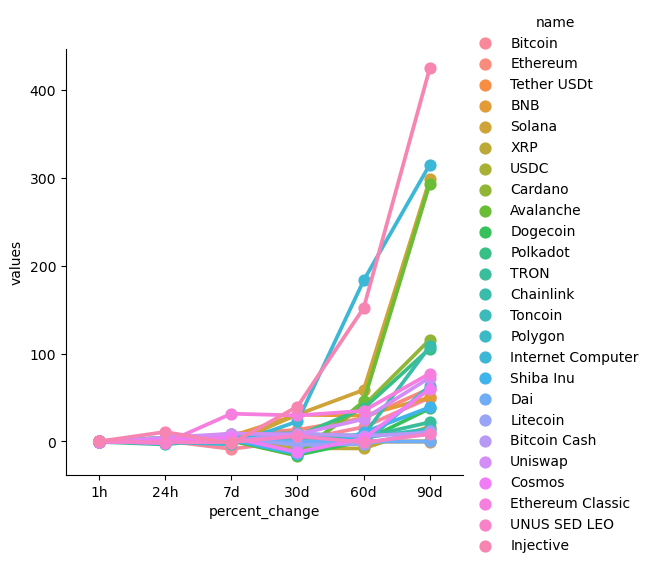

In [39]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df8, kind = 'point')

In [41]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,42562.34098,2024-01-15 19:07:42.483675
1,Ethereum,2513.90043,2024-01-15 19:07:42.483675
2,Tether USDt,0.99930,2024-01-15 19:07:42.483675
3,BNB,317.52577,2024-01-15 19:07:42.483675
4,Solana,95.43754,2024-01-15 19:07:42.483675
5,XRP,0.57312,2024-01-15 19:07:42.483675
6,USDC,1.00011,2024-01-15 19:07:42.483675
7,Cardano,0.53119,2024-01-15 19:07:42.483675
8,Avalanche,35.69511,2024-01-15 19:07:42.483675
9,Dogecoin,0.08104,2024-01-15 19:07:42.483675


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

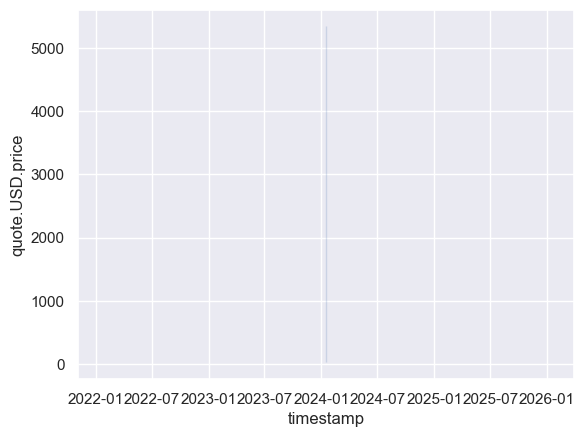

In [43]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)